# Plotly의 고급 그래프와 세부 커스터마이징 배우기

# **04-09 Plotly 여러개의 그래프 겹쳐 그리기**

1) 기본사용 방법

그래프를 겹쳐 그리는 방법은 2단계를 거칩니다.

1. Base 그래프 그리기 - 기초 그래프를 생성하는 단계입니다. - express 또는 graph_objects 를 활용해서 생성합니다.

2. 추가할 그래프 그리기

fig.add_trace(추가할 Trace 입력)
add_trace() 함수는 이미 생성된 Figure 위에 덧붙여서 새로은 그래프를 그릴때 사용하는 함수 입니다.

In [1]:
import plotly.express as px

# Base 그래프 그리기
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16],size = [20]*5)

fig.show()

In [2]:
import plotly.express as px
import plotly.graph_objects as go

# Base 그래프 그리기
fig = px.scatter(x = [0, 1, 2, 3, 4], y = [0, 1, 4, 9, 16], size = [20]*5)

# 추가 할 그래프 그리기
fig.add_trace(go.Scatter(x=[0, 1, 2, 3, 4], y = [0, 1, 4, 9, 16]))

fig.show()

예시 2

다음으로 graph_objects를 통해 생성한 figure 를 겹쳐 그리는 예시를 설명드리겠습니다.

In [4]:
# 1.Base 그래프 그리기


import plotly.graph_objects as go

# Base Figure 생성
fig = go.Figure()

fig.show()

In [5]:
# 2.추가 할 그래프 그리기

import plotly.graph_objects as go

#데이터 생성
import numpy as np
np.random.seed(1)

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

# Base Figure 생성
fig = go.Figure()

# 추가 할 그래프 그리기
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='markers',
                    name='markers'))

fig.show()

# **04-10 Plotly 여러개의 그래프 나눠 그리기**

1) 기본 사용 방법

그래프를 나눠 그리는 방법은 2단계를 거칩니다.

그래프를 나누어 그릴 공간 생성

그래프를 나누어 그릴 공간을 생성하는 과정입니다..

make_subplots() 통해 생성합니다.

각 공간에 Trace 채워넣기

fig.add_trace() 를 활용해서 각 공간에 Trace를 채워 넣습니다.

이때 fig.add_trace( row = , col = ) row와 col을 통해 각 공간의 index를 지정해줘야 합니다.

- 1단계: 그래프 나눠그리는 공간 생성

make_subplots() 함수를 통해 생성되는 공간은 격자 무늬의 공간입니다.

따라서 생성할 행의 수는 row 에 생성할 열의 수는 col 에 넣어줍니다.

1행 2열의 공간을 생성하면 Figure의 형태 및 공간 별 행, 열 index는 아래와 같습니다.

In [6]:
# make_subplots 패키지 불러오기
from plotly.subplots import make_subplots

# 나눠그릴 공간 생성
fig = make_subplots(rows= 1, cols= 2)

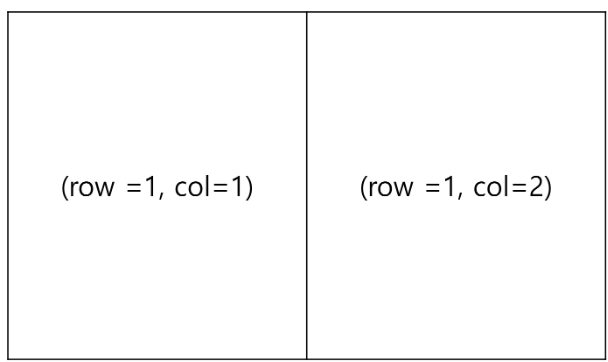

- 2단계: 각 공간에 Trace 채워넣기

add_trace() 함수를 활용하여 각각의 공간에 Trace 를 추가합니다. 이때 추가할 공간의 행과 열의 index를 잘 맞춰서 지정을 해야합니다.

예제 #1)

2행 1열의 공간을 생성해서 Scatter Trace를 채워보겠습니다.

In [7]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 나눠서 그릴 공간 생성
fig = make_subplots(rows=1, cols=2)

# 각 공간에 Trace 채워넣
fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
    row=1, col=2
)
fig.show()

예제 #2)

2행 2열의 공간을 생성해서 Scatter Trace를 채워보겠습니다.

In [8]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 나눠서 그릴 공간 생성
fig = make_subplots(rows=2, cols=2)

# 각 공간에 Trace 채워넣기
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
              row=1, col=1)

fig.add_trace(go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
              row=1, col=2)

fig.add_trace(go.Scatter(x=[300, 400, 500], y=[600, 700, 800]),
              row=2, col=1)

fig.add_trace(go.Scatter(x=[4000, 5000, 6000], y=[7000, 8000, 9000]),
              row=2, col=2)

fig.show()

2) 각 그래프 별 서브 타이틀 달기

[사용 함수]

fig.subplot_titles()

[함수 input 내용]

subplot_titles= (튜플 형태) , 각 공간별 서브타이틀을 순서대로 튜플형태로 넣어줍니다.

In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 나눠서 그릴 공간 생성
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4"))

# 각 공간에 Trace 채워넣기
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
              row=1, col=1)

fig.add_trace(go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
              row=1, col=2)

fig.add_trace(go.Scatter(x=[300, 400, 500], y=[600, 700, 800]),
              row=2, col=1)

fig.add_trace(go.Scatter(x=[4000, 5000, 6000], y=[7000, 8000, 9000]),
              row=2, col=2)

fig.update_layout(title_text="Multiple Subplots with Titles")

fig.show()

3) 각 공간별 크기 비율 지정하기

[사용 함수]

fig.subplot_titles()

[함수 input 내용]

column_widths = [ , ] 리스트 형태로 컬럼 별 길이 비율을 넣습니다.

row_heights = [ , ] 리스트 형태로 행 별 길이 비율을 넣습니다.

In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 나눠서 그릴 공간 생성
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.7, 0.3], row_heights =[0.7, 0.3])

# 각 공간에 Trace 채워넣기
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
              row=1, col=1)

fig.add_trace(go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
              row=1, col=2)

fig.add_trace(go.Scatter(x=[300, 400, 500], y=[600, 700, 800]),
              row=2, col=1)

fig.add_trace(go.Scatter(x=[4000, 5000, 6000], y=[7000, 8000, 9000]),
              row=2, col=2)

fig.show()

4) 공간 별 축 공유하기

[사용 함수]

fig.subplot_titles()

[함수 input 내용]

shared_xaxes= (True or False) 같은 행끼리 x축 공유 여부.

shared_yaxes= (True or False) 같은 열끼리 y축 공유 여부.

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 나눠서 그릴 공간 생성
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True)

# 각 공간에 Trace 채워넣기
fig.add_trace(go.Scatter(x=[0, 1, 2], y=[10, 11, 12]),
              row=3, col=1)

fig.add_trace(go.Scatter(x=[2, 3, 4], y=[100, 110, 120]),
              row=2, col=1)

fig.add_trace(go.Scatter(x=[3, 4, 5], y=[1000, 1100, 1200]),
              row=1, col=1)

# Figure 크기, 타이틀 설정
fig.update_layout(height=600, width=600,
                    title_text="Stacked Subplots with Shared X-Axes")

fig.show()

5) 분할 공간 병합하기

[사용 함수]

fig.subplot_titles()

[함수 input 내용]

specs = [[첫번째행 구조],[두번째행 구조]....[마지막행 구조] ], 리스트 형태로 원하는 격자구조를 입력하면 됩니다.

아래 예제를 보고 다시 설명드리겠습니다.

specs=[[{}, {}],

[{"colspan": 2}, None]]

1행 : [[{}, {}] 모두 사용하기 때문에 Trace를 뜻하는 {} 로 1,2열 모두 표시

2행 : [{"colspan": 2}, None]] 1열을 2열까지 병합하기에 1열 자리에 {"colspan": 2} 넣고 2열 자리는 None 이라고 표시


In [13]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 나눠서 그릴 공간 생성
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
           subplot_titles=("First Subplot","Second Subplot", "Third Subplot"))

# 각 공간에 Trace 채워넣기
fig.add_trace(go.Scatter(x=[1, 2], y=[1, 2]),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=[1, 2], y=[1, 2]),
                 row=1, col=2)
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[2, 1, 2]),
                 row=2, col=1)

# Figure 타이틀 설정
fig.update_layout(showlegend=False, title_text="Specs with Subplot Title")

fig.show()

# **04-11 Plotly 이중 Y축 표시하기**

Plotly에서 두종류의 데이터를 동시에 하나의 그래프 안에 효과적으로 표시하기 위해 2개의 Y축을 표시하는 방법에 대해 알아봅니다.

1) 2중 Y축 사용 이유

두개의 다른 데이터를 한개의 Figure에 같이 그리면 축의 범위가 너무 넒어져 아래의 빨간색 라인처럼 각 데이터의 경향 파악이 힘들수 있습니다.

이럴때 2개의 Y축을 사용하여 각 데이터의 범위를 각기 조정하여 가시성을 높일 수 있습니다.

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[40, 50, 60], name="yaxis data"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=[2, 3, 4], y=[4, 5, 6], name="yaxis2 data"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()

specs=[[{"secondary_y": True}]] 로 값을 넣습니다.

이중 대괄호 안에 {"secondary_y": True} 값을 넣었습니다.

풀어 이야기하자면 1행, 1열의 Trace에 2중 Y축을 활성화 한다는 뜻 입니다.

1번 Trace는 secondary_y=False 로 지정해서 기존과 같이 왼쪽에 축이 생성됩니다.

2번 Trace는 secondary_y=True 로 지정해서 이중축을 활성화 하였기 때문에 오른쪽에 축이 생성이 됩니다.

2) 여러개 그래프 이중 Y축 설정하기

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}]])

# Top left
fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[2, 52, 62], name="yaxis data"),
    row=1, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[40, 50, 60], name="yaxis2 data"),
    row=1, col=1, secondary_y=True,
)

# Top right
fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[2, 52, 62], name="yaxis3 data"),
    row=1, col=2, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[40, 50, 60], name="yaxis4 data"),
    row=1, col=2, secondary_y=True,
)

# Bottom left
fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[2, 52, 62], name="yaxis5 data"),
    row=2, col=1, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[40, 50, 60], name="yaxis6 data"),
    row=2, col=1, secondary_y=True,
)

# Bottom right
fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[2, 52, 62], name="yaxis7 data"),
    row=2, col=2, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[40, 50, 60], name="yaxis8 data"),
    row=2, col=2, secondary_y=True,
)

fig.show()

# **04-17 Plotly Color 활용하기(Colormap)**


1) CSS 색 이름으로 넣기

In [16]:
import plotly.express as px

fig = px.bar(x=["a","b","c"], y=[1,3,2], color=["red", "green", "blue"], color_discrete_map="identity")

fig.show()

2) RGB 값으로 넣기

In [17]:
import plotly.express as px

fig = px.bar(x=["a","b","c"], y=[1,3,2], color=["rgb(255,0,0)", "rgb(0,128,0)", "rgb(0,0,255)"], color_discrete_map="identity")

fig.show()

3) Color Code로 입력

In [18]:
import plotly.express as px

fig = px.bar(x=["a","b","c"], y=[1,3,2], color=["#FF0000", "#008000","#0000FF"], color_discrete_map="identity")

fig.show()

4) Plotly Colormap 종류 소개

(1) 불연속 데이터용 Colormap

In [19]:
import plotly.express as px
fig = px.colors.qualitative.swatches()
fig.show()

(2) 연속 데이터용 Colormap

px.colors.sequential.컬러맵명 을 붙여 사용합니다.

ex) px.colors.sequential.Viridis, px.colors.sequential.Inferno

In [20]:
import plotly.express as px
fig = px.colors.sequential.swatches_continuous()
fig.show()

(3) 발산 데이터용 Colormap

발산 데이터용 Colormap 중간에 흰색으로 수렴을 하는 연속형 Colormap set 입니다.

px.colors.diverging.컬러맵명 을 붙여 사용합니다.

ex) px.colors.diverging.BrBg, px.colors.diverging.PiYG

In [24]:
import plotly.express as px
fig = px.colors.diverging.swatches_continuous()
fig.show()

(4) 순환 데이터용 Colormap

순환 데이터 colormap은 순환하는 시간 데이터(시간,요일,계절)에 사용하기 용의한 Colormap set 입니다.

px.colors.cyclical.컬러맵명 을 붙여 사용합니다.

ex) px.colors.cyclical.Twilight, px.colors.cyclical.IceFire

In [25]:
import plotly.express as px
fig = px.colors.cyclical.swatches_cyclical()
fig.show()

5) Plotly Colormap 사용방법

 - express

# 범주형 데이터
color_discrete_sequence = 컬러맵명
# 연속형/발산형/순환영 데이터
color_continuous_scale= 컬러맵명

예제 1) Bar 차트에 컬러맵 적용하기(불연속 데이터)

Bar 차트는 보통 연속형 데이터가 아닌 범주형 데이터를 표현할때 씁니다.

불연속 그래프의 색 지정은 color_discrete_sequence = 를 통해 넣습니다.

불연속 데이터용 Colormap 중 "G10" 을 사용해서 자동으로 각 막대마다의 색을 지정하였습니다.

In [28]:
import plotly.express as px

# 데이터 불러오기
df = px.data.gapminder().query("year == 2007")

# 그래프 그리기
fig = px.bar(df, y = "continent", x = "pop", color = "continent", color_discrete_sequence = px.colors.qualitative.G10)

fig.show()

예제 2) 산점도 그래프에 컬러맵 적용하기(연속형 데이터)

산점도 그래프는 보통 연속형 데이터로 표현이 됩니다.

연속형 데이터의 색 지정은 color_continuous_scale = 를 통해 넣습니다.

연속형 데이터용 Colormap 중 "Viridis" 을 사용해서 sepal_length 별 연속형 색을 지정하였습니다.

In [29]:
import plotly.express as px
# 데이터 불러오기
df = px.data.iris()

# 그래프 그리기
fig = px.scatter(df, x="sepal_width", y="sepal_length",
                 color="sepal_length", color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

- graph_objects

graph_objects 의 go.Scatter 를 통해 시각화를 하였습니다.

marker_color = values 를 통해 values 별로 서로 다른 마커 색깔을 지정합니다.

marker_colorscale = 연속 데이터용 Colormap의 "Viridis"를 지정하였습니다.

In [30]:
import plotly.graph_objects as go
import plotly.express as px

#Figure 생성
fig = go.Figure()

# 데이터 생성
values = list(range(40))

fig.add_trace(go.Scatter(
    x=values,
    y=values,
    marker_size=16,
    marker_cmax=39,
    marker_cmin=0,
    marker_color=values,
    marker_colorbar_title = "Colorbar",
    marker_colorscale = "Viridis",
    mode="markers"))

fig.show()

5) Colorbar 삭제 하기

[사용 함수]

fig.update_layout()

[함수 input 내용]

coloraxis_showscale= False

In [31]:
import plotly.express as px
# 데이터 불러오기
df = px.data.iris()

# 그래프 그리기
fig = px.scatter(df, x="sepal_width", y="sepal_length",
                 color="sepal_length", color_continuous_scale=px.colors.sequential.Viridis)


fig.update_layout(coloraxis_showscale=False)

fig.show()

# **04-20 Pandas에서 바로 Plotly 사용하기**

1) Plotly를 기본 plotting backend로 설정하기

import pandas as pd

pd.options.plotting.backend = "plotly"


(1) 변경 전 plot ( 기본 Matplotlib 기반 그래프 생성 )

<Axes: >

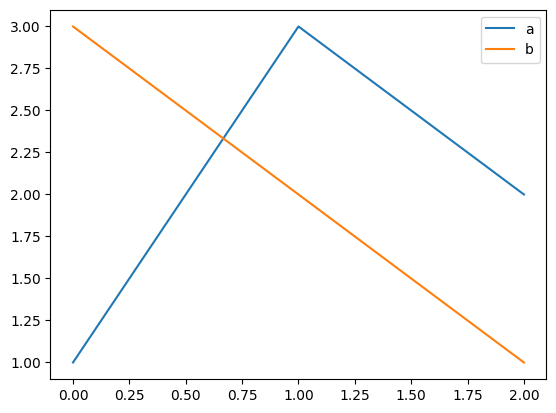

In [32]:
import pandas as pd
df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1]))
df.plot()

(2) 변경 후 plot (plotly 기반 그래프 생성)

In [33]:
import pandas as pd

pd.options.plotting.backend = "plotly"

df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1]))
fig = df.plot()
fig.show()

2) Bar Plot 그리기

In [34]:
import pandas as pd
pd.options.plotting.backend = "plotly"

df = pd.DataFrame(dict(a = [1, 3, 2], b = [3, 2, 1]))

fig1 = df.plot.bar()
fig1.show()

3) Scatter Plot 그리기

In [35]:
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"
np.random.seed(1)

df = pd.DataFrame(dict(
    a = np.random.normal(loc = 1, scale = 2, size = 100),
    b = np.random.normal(loc = 2, scale = 1, size = 100)
))
fig = df.plot.scatter(x = 'a', y = 'b')
fig.show()

4) 히스토그램 그리기

In [36]:
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"
np.random.seed(1)

df = pd.DataFrame(dict(
    a=np.random.normal(loc=1, scale=2, size=100),
    b=np.random.normal(loc=2, scale=1, size=100)
))
fig = df.plot.hist()
fig.show()

5) Box Plot 그리기

In [37]:
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"
np.random.seed(1)

df = pd.DataFrame(dict(
    a=np.random.normal(loc=1, scale=2, size=100),
    b=np.random.normal(loc=2, scale=1, size=100)
))

fig = df.plot.box()
fig.show()